In [22]:
import pandas as pd
from pandas import set_option
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [23]:
df1 = pd.read_csv("price_demand_data.csv")

In [ ]:
df1.keys()

In [ ]:
df1.head()

In [ ]:
df1.tail()

In [24]:
df2 = pd.read_csv("weather_data.csv")

In [ ]:
df2.head()

In [ ]:
df2.tail()

In [ ]:
df1.columns

In [ ]:
df1.shape

In [12]:
df2.columns

Index(['Date', 'Minimum temperature (°C)', 'Maximum temperature (°C)',
       'Rainfall (mm)', 'Evaporation (mm)', 'Sunshine (hours)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       'Time of maximum wind gust', '9am Temperature (°C)',
       '9am relative humidity (%)', '9am cloud amount (oktas)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm Temperature (°C)', '3pm relative humidity (%)',
       '3pm cloud amount (oktas)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)'],
      dtype='object')

In [13]:
df2.shape

(243, 21)

In [14]:
df1.describe()

,TOTALDEMAND
count,11664.000000
mean,4925.798454
std,876.407490
min,2708.530000
25%,4255.500000
50%,4803.755000
75%,5477.337500
max,8196.830000


In [15]:
df2.describe()

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm MSL pressure (hPa)
count,242.000000,242.000000,241.000000,243.000000,243.000000,240.000000,242.000000,242.000000,243.000000,241.000000,243.000000,243.000000,242.000000,242.000000
mean,11.050826,19.445868,1.576763,3.902469,5.349383,34.412500,13.720661,74.454545,5.164609,1017.740664,18.040329,56.930041,5.301653,1015.824793
std,3.870242,5.354085,4.498754,2.702141,3.604902,10.909319,4.306618,14.177593,2.562778,7.683402,4.963547,14.017376,2.392051,7.435859
min,1.700000,10.600000,0.000000,0.000000,0.000000,15.000000,3.000000,25.000000,0.000000,989.700000,8.600000,21.000000,0.000000,989.000000
25%,8.100000,15.500000,0.000000,1.900000,2.150000,28.000000,10.925000,65.000000,3.000000,1012.800000,14.400000,48.000000,3.000000,1011.000000
50%,10.900000,18.300000,0.000000,3.200000,4.900000,33.000000,13.400000,75.000000,7.000000,1018.100000,17.100000,56.000000,7.000000,1015.750000
75%,13.800000,21.800000,0.600000,5.600000,8.350000,41.000000,16.400000,84.000000,7.000000,1023.700000,20.150000,66.000000,7.000000,1021.600000
max,22.200000,39.200000,43.200000,13.800000,13.100000,67.000000,30.900000,100.000000,8.000000,1034.200000,35.200000,98.000000,8.000000,1032.400000


In [25]:
# Get the dd/mm/yyyy field from SETTLEMENTDATE so we can join it with the weather
# Separate the Day and Month from Date
df1['Date'] = df1['SETTLEMENTDATE'].apply(lambda x: x.split()[0])
#df1['Day'] = df1['SETTLEMENTDATE'].apply(lambda x: x.split('/')[0])
#df1['Month'] = df1['SETTLEMENTDATE'].apply(lambda x: x.split('/')[1])
df1.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date
0,VIC1,1/01/2021 0:30,4179.21,LOW,1/01/2021
1,VIC1,1/01/2021 1:00,4047.76,LOW,1/01/2021
2,VIC1,1/01/2021 1:30,3934.70,LOW,1/01/2021
3,VIC1,1/01/2021 2:00,3766.45,LOW,1/01/2021
4,VIC1,1/01/2021 2:30,3590.37,LOW,1/01/2021


In [26]:
# merge two datasets together (df1 as price_demand and df2 as weather)
data = df1.merge(df2, left_on='Date', right_on='Date')
data["Date"] = pd.to_datetime(data.Date, format="%d/%m/%Y")
data

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11658,VIC1,31/08/2021 21:30,5075.93,MEDIUM,2021-08-31,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,2021-08-31,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,2021-08-31,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,2021-08-31,11.0,20.1,0.0,5.8,3.6,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2


In [27]:
# replaece price's category with int index 
newdata = data.replace({'LOW':1,'MEDIUM':2,'HIGH':3,'EXTREME':4},regex = True)

In [29]:
# Aggregate daily energy usage from every half an hour data to a daily mean value
aggregate_data = newdata.groupby('Date').mean()
newdata1 = aggregate_data.astype({"PRICECATEGORY": int})
newdata1.head()

,TOTALDEMAND,PRICECATEGORY,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,
2021-01-01,3954.327,1,15.6,29.9,0.0,2.8,9.3,31.0,19.2,77.0,6.0,1018.8,28.1,43.0,5.0,1015.3
2021-01-02,4124.794,1,18.4,29.0,0.0,9.4,1.3,30.0,23.3,52.0,7.0,1013.3,28.7,38.0,7.0,1008.5
2021-01-03,3932.145,1,17.0,26.2,12.6,4.8,7.1,33.0,18.3,100.0,8.0,1007.7,23.5,59.0,4.0,1005.2
2021-01-04,4151.689,1,16.0,18.6,2.6,3.8,0.0,41.0,16.2,98.0,8.0,1010.0,18.2,82.0,8.0,1011.0
2021-01-05,4326.686,1,15.9,19.1,11.2,1.0,0.0,35.0,17.2,96.0,8.0,1012.5,18.2,82.0,8.0,1013.3


In [11]:
newdata1.shape

(243, 16)

In [12]:
newdata1.describe()

,TOTALDEMAND,PRICECATEGORY,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm MSL pressure (hPa)
count,243.000000,243.000000,242.000000,242.000000,241.000000,243.000000,243.000000,240.000000,242.000000,242.000000,243.000000,241.000000,243.000000,243.000000,242.000000,242.000000
mean,4925.724985,1.152263,11.050826,19.445868,1.576763,3.902469,5.349383,34.412500,13.720661,74.454545,5.164609,1017.740664,18.040329,56.930041,5.301653,1015.824793
std,550.535524,0.413443,3.870242,5.354085,4.498754,2.702141,3.604902,10.909319,4.306618,14.177593,2.562778,7.683402,4.963547,14.017376,2.392051,7.435859
min,3725.987083,1.000000,1.700000,10.600000,0.000000,0.000000,0.000000,15.000000,3.000000,25.000000,0.000000,989.700000,8.600000,21.000000,0.000000,989.000000
25%,4486.043958,1.000000,8.100000,15.500000,0.000000,1.900000,2.150000,28.000000,10.925000,65.000000,3.000000,1012.800000,14.400000,48.000000,3.000000,1011.000000
50%,4939.986042,1.000000,10.900000,18.300000,0.000000,3.200000,4.900000,33.000000,13.400000,75.000000,7.000000,1018.100000,17.100000,56.000000,7.000000,1015.750000
75%,5322.773333,1.000000,13.800000,21.800000,0.600000,5.600000,8.350000,41.000000,16.400000,84.000000,7.000000,1023.700000,20.150000,66.000000,7.000000,1021.600000
max,6231.436458,3.000000,22.200000,39.200000,43.200000,13.800000,13.100000,67.000000,30.900000,100.000000,8.000000,1034.200000,35.200000,98.000000,8.000000,1032.400000


In [30]:
newdata1.tail()

,TOTALDEMAND,PRICECATEGORY,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,
2021-08-27,5593.547,1,4.6,13.6,0.0,1.2,3.8,15.0,7.7,88.0,7.0,1020.0,12.8,65.0,7.0,1017.4
2021-08-28,4356.353,1,5.3,17.8,0.0,1.6,9.6,39.0,9.1,80.0,1.0,1018.6,17.4,31.0,3.0,1013.5
2021-08-29,4676.028,1,9.1,16.2,0.6,6.4,4.3,33.0,10.6,79.0,7.0,1011.4,12.8,84.0,7.0,1010.4
2021-08-30,4836.633,1,6.4,17.6,4.0,1.4,7.4,50.0,11.1,70.0,7.0,1016.1,16.8,45.0,1.0,1013.2
2021-08-31,4719.589,1,11.0,20.1,0.0,5.8,3.6,61.0,13.5,53.0,7.0,NaN,19.4,43.0,6.0,1012.2


In [15]:
# Check if there is any null or false values. 
newdata1.isnull().values.any()

True

In [66]:
newdata2= newdata1.fillna(newdata1.mean())
newdata2

,TOTALDEMAND,PRICECATEGORY,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,
2021-01-01,3954.327,1,15.6,29.9,0.0,2.8,9.3,31.0,19.2,77.0,6.0,1018.800,28.1,43.0,5.0,1015.3
2021-01-02,4124.794,1,18.4,29.0,0.0,9.4,1.3,30.0,23.3,52.0,7.0,1013.300,28.7,38.0,7.0,1008.5
2021-01-03,3932.145,1,17.0,26.2,12.6,4.8,7.1,33.0,18.3,100.0,8.0,1007.700,23.5,59.0,4.0,1005.2
2021-01-04,4151.689,1,16.0,18.6,2.6,3.8,0.0,41.0,16.2,98.0,8.0,1010.000,18.2,82.0,8.0,1011.0
2021-01-05,4326.686,1,15.9,19.1,11.2,1.0,0.0,35.0,17.2,96.0,8.0,1012.500,18.2,82.0,8.0,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,5593.547,1,4.6,13.6,0.0,1.2,3.8,15.0,7.7,88.0,7.0,1020.000,12.8,65.0,7.0,1017.4
2021-08-28,4356.353,1,5.3,17.8,0.0,1.6,9.6,39.0,9.1,80.0,1.0,1018.600,17.4,31.0,3.0,1013.5
2021-08-29,4676.028,1,9.1,16.2,0.6,6.4,4.3,33.0,10.6,79.0,7.0,1011.400,12.8,84.0,7.0,1010.4


In [67]:
# pearson correlation to find possible relation between each attribute
correlations = newdata2.corr(method='pearson')
print(correlations)

                                   TOTALDEMAND  PRICECATEGORY  Minimum temperature (°C)  \
TOTALDEMAND                              1.000          0.451                    -0.463   
PRICECATEGORY                            0.451          1.000                    -0.361   
Minimum temperature (°C)                -0.463         -0.361                     1.000   
Maximum temperature (°C)                -0.358         -0.321                     0.708   
Rainfall (mm)                           -0.062         -0.023                     0.043   
Evaporation (mm)                        -0.298         -0.337                     0.655   
Sunshine (hours)                        -0.282         -0.152                     0.082   
Speed of maximum wind gust (km/h)        0.063         -0.279                     0.056   
9am Temperature (°C)                    -0.399         -0.367                     0.916   
9am relative humidity (%)                0.176          0.282                    -0.334   

In [17]:
newdata2.isnull().any()

TOTALDEMAND                          False
PRICECATEGORY                        False
Minimum temperature (°C)             False
Maximum temperature (°C)             False
Rainfall (mm)                        False
Evaporation (mm)                     False
Sunshine (hours)                     False
Speed of maximum wind gust (km/h)    False
9am Temperature (°C)                 False
9am relative humidity (%)            False
9am cloud amount (oktas)             False
9am MSL pressure (hPa)               False
3pm Temperature (°C)                 False
3pm relative humidity (%)            False
3pm cloud amount (oktas)             False
3pm MSL pressure (hPa)               False
dtype: bool

In [81]:
# drop the unnecessary attributes
newdata3 = newdata2[['PRICECATEGORY','TOTALDEMAND','9am Temperature (°C)','Evaporation (mm)','Maximum temperature (°C)','Minimum temperature (°C)']]
newdata3

,PRICECATEGORY,TOTALDEMAND,9am Temperature (°C),Evaporation (mm),Maximum temperature (°C),Minimum temperature (°C)
Date,,,,,,
2021-01-01,1,3954.327,19.2,2.8,29.9,15.6
2021-01-02,1,4124.794,23.3,9.4,29.0,18.4
2021-01-03,1,3932.145,18.3,4.8,26.2,17.0
2021-01-04,1,4151.689,16.2,3.8,18.6,16.0
2021-01-05,1,4326.686,17.2,1.0,19.1,15.9
...,...,...,...,...,...,...
2021-08-27,1,5593.547,7.7,1.2,13.6,4.6
2021-08-28,1,4356.353,9.1,1.6,17.8,5.3
2021-08-29,1,4676.028,10.6,6.4,16.2,9.1


In [82]:
set_option('display.width', 100)
set_option('precision', 3)
description = newdata3.describe()
print(description)

       PRICECATEGORY  TOTALDEMAND  9am Temperature (°C)  Evaporation (mm)  \
count        243.000      243.000               243.000           243.000   
mean           1.152     4925.725                13.721             3.902   
std            0.413      550.536                 4.298             2.702   
min            1.000     3725.987                 3.000             0.000   
25%            1.000     4486.044                10.950             1.900   
50%            1.000     4939.986                13.400             3.200   
75%            1.000     5322.773                16.400             5.600   
max            3.000     6231.436                30.900            13.800   

       Maximum temperature (°C)  Minimum temperature (°C)  
count                   243.000                   243.000  
mean                     19.446                    11.051  
std                       5.343                     3.862  
min                      10.600                     1.700  
25%   

In [20]:
# Distribute data by using pricecategory
#class_counts = newdata3.groupby('PRICECATEGORY').size()
#print(class_counts)

PRICECATEGORY
1    211
2     27
3      5
dtype: int64


In [83]:
# Pairwise Pearson correlations
correlations = newdata3.corr(method='pearson')
print(correlations)

                          PRICECATEGORY  TOTALDEMAND  9am Temperature (°C)  Evaporation (mm)  \
PRICECATEGORY                     1.000        0.451                -0.367            -0.337   
TOTALDEMAND                       0.451        1.000                -0.399            -0.298   
9am Temperature (°C)             -0.367       -0.399                 1.000             0.706   
Evaporation (mm)                 -0.337       -0.298                 0.706             1.000   
Maximum temperature (°C)         -0.321       -0.358                 0.820             0.621   
Minimum temperature (°C)         -0.361       -0.463                 0.916             0.655   

                          Maximum temperature (°C)  Minimum temperature (°C)  
PRICECATEGORY                               -0.321                    -0.361  
TOTALDEMAND                                 -0.358                    -0.463  
9am Temperature (°C)                         0.820                     0.916  
Evaporation

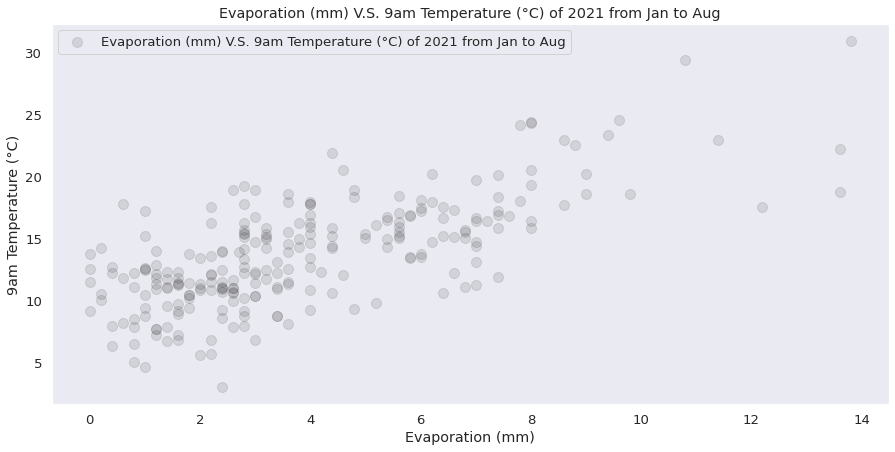

In [84]:
# Basic scatterplot
plt.rcParams["figure.figsize"] = (15, 7) # Larger figure size
plt.rc('font', size=14) # set the fontsize

# Basic scatter plot
plt.scatter(x=newdata3['Evaporation (mm)'], 
            y=newdata3['9am Temperature (°C)'], 
            s=100, # s determinines the size of the markers
            alpha=0.1, # alpha determines the opacity
            c='black', # this determines the colour
            label='Evaporation (mm) V.S. 9am Temperature (°C) of 2021 from Jan to Aug' # the label of the plot if a legend is used
)

# other formatting options
plt.grid()
plt.xlabel('Evaporation (mm)')
plt.ylabel('9am Temperature (°C)')
plt.title("Evaporation (mm) V.S. 9am Temperature (°C) of 2021 from Jan to Aug")
plt.legend()

# show the figure
plt.show()

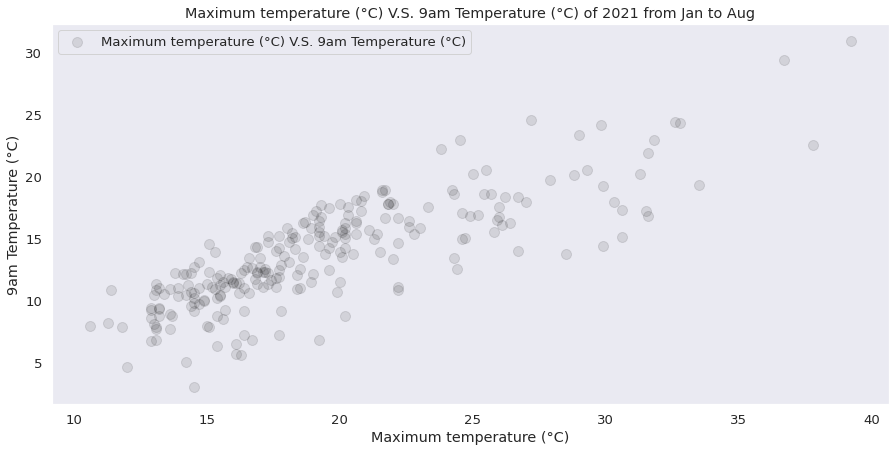

In [76]:
# Basic scatterplot
plt.rcParams["figure.figsize"] = (15, 7) # Larger figure size
plt.rc('font', size=14) # set the fontsize

# Basic scatter plot
plt.scatter(x=newdata3['9am Temperature (°C)'], 
            y=newdata3['Maximum temperature (°C)'],
            s=100, # s determinines the size of the markers
            alpha=0.1, # alpha determines the opacity
            c='black', # this determines the colour
            label='Maximum temperature (°C) V.S. 9am Temperature (°C)' # the label of the plot if a legend is used
)

# other formatting options
plt.grid()
plt.xlabel('Maximum temperature (°C)')
plt.ylabel('9am Temperature (°C)')
plt.title("Maximum temperature (°C) V.S. 9am Temperature (°C) of 2021 from Jan to Aug")
plt.legend()

# show the figure
plt.show()

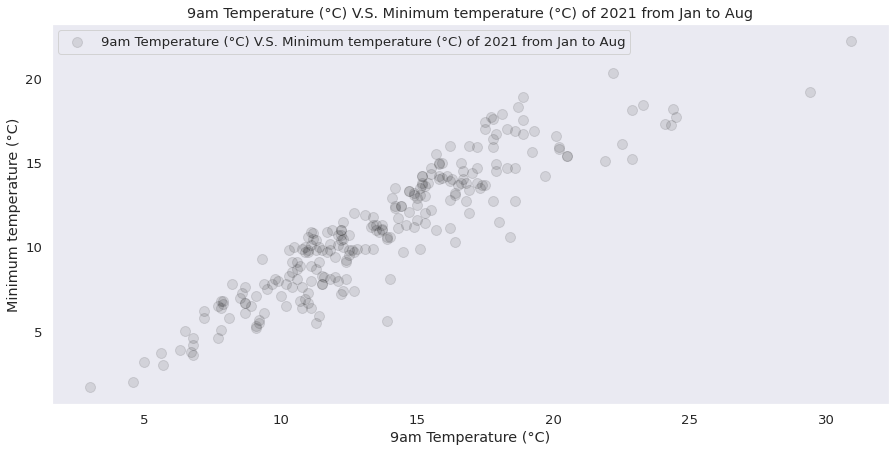

In [85]:
# Basic scatterplot
plt.rcParams["figure.figsize"] = (15, 7) # Larger figure size
plt.rc('font', size=14) # set the fontsize

# Basic scatter plot
plt.scatter(x=newdata3['9am Temperature (°C)'], 
            y=newdata3['Minimum temperature (°C)'],
            s=100, # s determinines the size of the markers
            alpha=0.1, # alpha determines the opacity
            c='black', # this determines the colour
            label='9am Temperature (°C) V.S. Minimum temperature (°C) of 2021 from Jan to Aug' # the label of the plot if a legend is used
)

# other formatting options
plt.grid()
plt.xlabel('9am Temperature (°C)')
plt.ylabel('Minimum temperature (°C)')
plt.title("9am Temperature (°C) V.S. Minimum temperature (°C) of 2021 from Jan to Aug")
plt.legend()

# show the figure
plt.show()

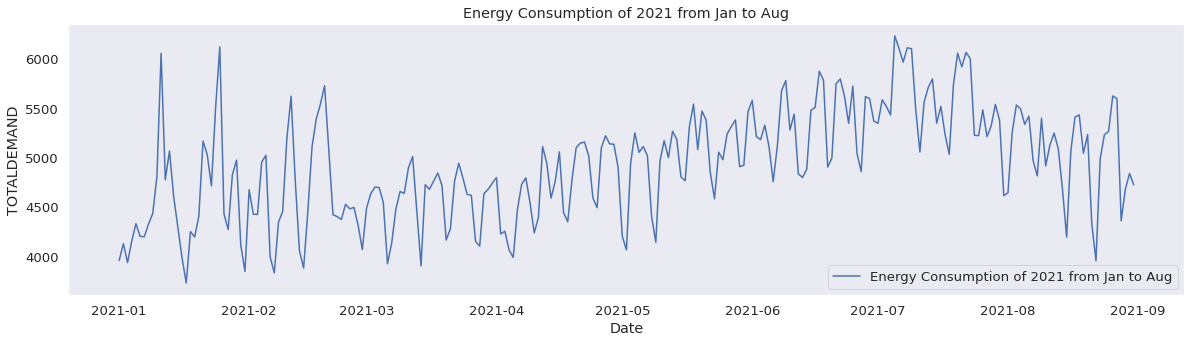

In [87]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(newdata3["TOTALDEMAND"], label='Energy Consumption of 2021 from Jan to Aug')

# other formatting options
plt.grid()
plt.xlabel('Date')
plt.ylabel('TOTALDEMAND')
plt.title("Energy Consumption of 2021 from Jan to Aug")
plt.legend()

# show the figure
plt.show()

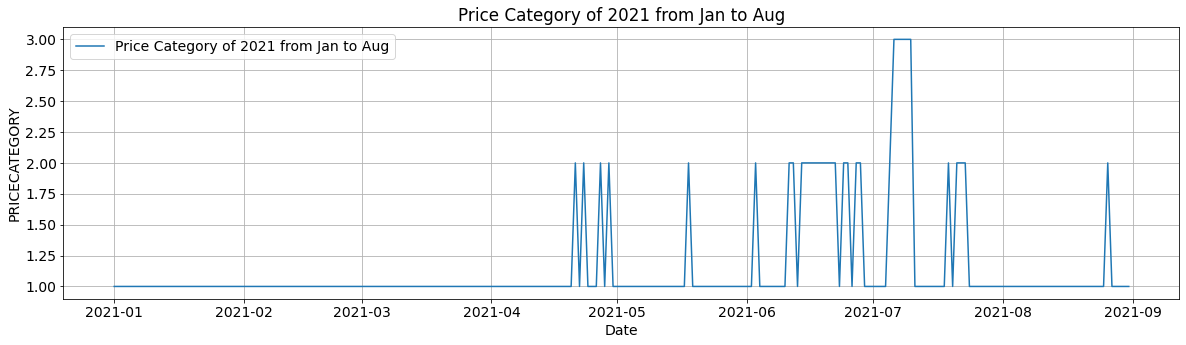

In [58]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(newdata3["PRICECATEGORY"], label='Price Category of 2021 from Jan to Aug')

# other formatting options
plt.grid()
plt.xlabel('Date')
plt.ylabel('PRICECATEGORY')
plt.title("Price Category of 2021 from Jan to Aug")
plt.legend()

# show the figure
plt.show()

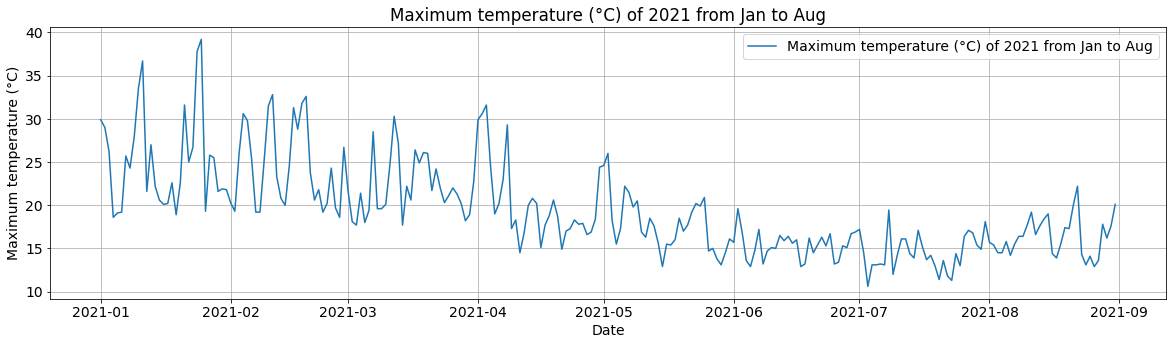

In [59]:
plt.plot(newdata3["Maximum temperature (°C)"], label='Maximum temperature (°C) of 2021 from Jan to Aug')

# other formatting options
plt.grid()
plt.xlabel('Date')
plt.ylabel('Maximum temperature (°C)')
plt.title("Maximum temperature (°C) of 2021 from Jan to Aug")
plt.legend()

# show the figure
plt.show()

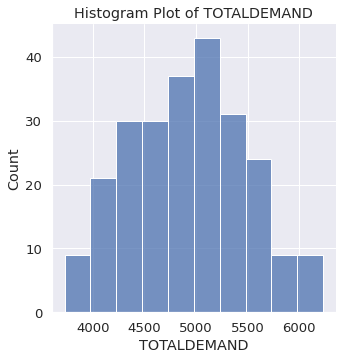

In [64]:
# plot a seaborn distribution plot
sns.displot(newdata3['TOTALDEMAND'])

# set figure size using seaborn
sns.set(font_scale=1.2)

# but use matplotlib to set the title
plt.title('Histogram Plot of TOTALDEMAND')

# show the plot
plt.show()

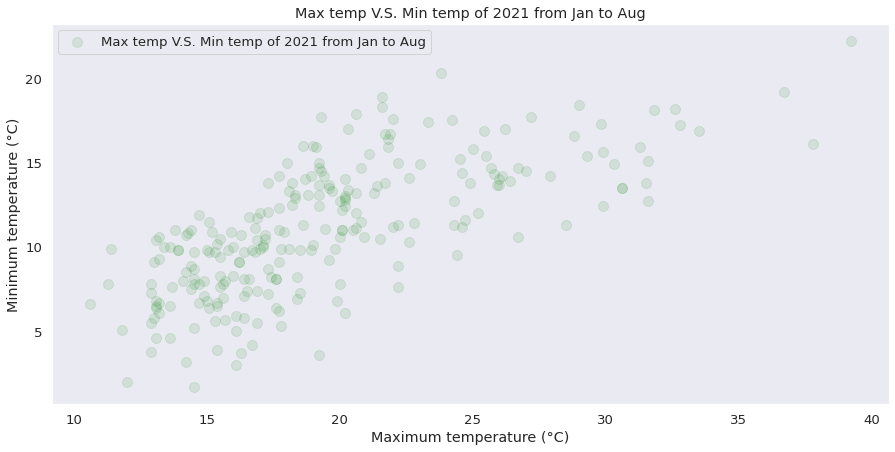

In [65]:
# Basic scatterplot
plt.rcParams["figure.figsize"] = (15, 7) # Larger figure size
plt.rc('font', size=14) # set the fontsize

# Basic scatter plot
plt.scatter(x=newdata3['Maximum temperature (°C)'], 
            y=newdata3['Minimum temperature (°C)'], 
            s=100, # s determinines the size of the markers
            alpha=0.1, # alpha determines the opacity
            c='green', # this determines the colour
            label='Max temp V.S. Min temp of 2021 from Jan to Aug' # the label of the plot if a legend is used
)

# other formatting options
plt.grid()
plt.xlabel('Maximum temperature (°C)')
plt.ylabel('Minimum temperature (°C)')
plt.title("Max temp V.S. Min temp of 2021 from Jan to Aug")
plt.legend()

# show the figure
plt.show()

In [35]:
#show all our plots in the notebook
%matplotlib inline

#train = data.drop(['REGION','SETTLEMENTDATE','Evaporation (mm)', 'Sunshine (hours)',
       'Direction of maximum wind gust ', 'Time of maximum wind gust', '9am Temperature (°C)',
       '9am relative humidity (%)', '9am cloud amount (oktas)',
       '9am wind direction', '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm Temperature (°C)', '3pm relative humidity (%)',
       '3pm cloud amount (oktas)', '3pm wind direction',
       '3pm wind speed (km/h)', '3pm MSL pressure (hPa)'], axis=1)
#train

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

,TOTALDEMAND,PRICECATEGORY,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h)
0,4179.21,LOW,1/01/2021,15.6,29.9,0.0,31.0
1,4047.76,LOW,1/01/2021,15.6,29.9,0.0,31.0
2,3934.70,LOW,1/01/2021,15.6,29.9,0.0,31.0
3,3766.45,LOW,1/01/2021,15.6,29.9,0.0,31.0
4,3590.37,LOW,1/01/2021,15.6,29.9,0.0,31.0
...,...,...,...,...,...,...,...
11658,5075.93,MEDIUM,31/08/2021,11.0,20.1,0.0,61.0
11659,4861.91,MEDIUM,31/08/2021,11.0,20.1,0.0,61.0
11660,4748.74,MEDIUM,31/08/2021,11.0,20.1,0.0,61.0
11661,4620.09,MEDIUM,31/08/2021,11.0,20.1,0.0,61.0


In [46]:
test = data['TOTALDEMAND']

In [41]:
# build a train model
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=2)

In [47]:
# make linear regression model
regr = LinearRegression()

In [51]:
pred = regr.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [50]:
pred

NameError: name 'pred' is not defined

In [49]:
# check mode if efficient
regr.score(X_test, y_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.